In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

1. Análisis exploratorio

In [3]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [4]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [5]:
df.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


In [6]:
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

df.drop(not_useful_columns, axis=1, inplace=True)

In [7]:
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]

df.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)

In [8]:
df.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Host Since                       2044
Host Response Time                  5
Host Response Rate                 68
Host Acceptance Rate               11
Host Verifications                191
Street                           1438
Neighbourhood                     352
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       48
City                              223
State                              94
Zipcode                           536
Market                             43
Smart Location                    232
Country Code                       18
Country                            18
Latitude                        11824
Longitude                       11824
Property Type                      21
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities   

In [9]:
df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

In [10]:
print(f'El dataframe tiene un total de {len(df)} filas.')
len(df) - df.count()

El dataframe tiene un total de 11824 filas.


Experiences Offered                 0
Host Since                          3
Host Response Time               1507
Host Response Rate               1507
Host Acceptance Rate            11794
Host Verifications                  7
Neighbourhood                    4159
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Bed Type                            0
Amenities                         141
Square Feet                     11350
Price                              15
Security Deposit                 6772
Cleaning Fee                     4850
Guests Included                     0
Extra People

In [11]:
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

1.1 Variables redundantes

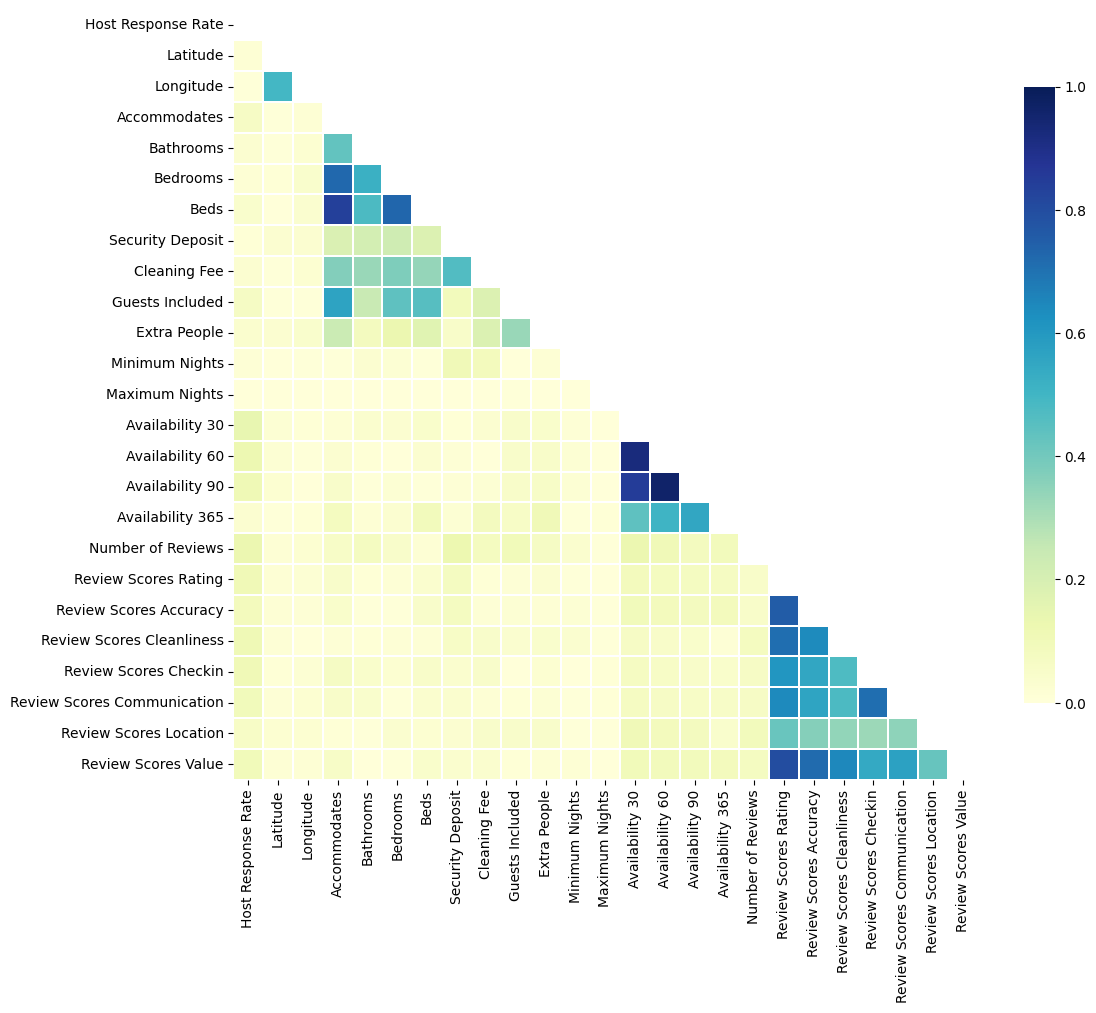

In [16]:
import seaborn as sns

df_numeric = df.select_dtypes(include=[np.number])
corr = np.abs(df_numeric.drop(['Price'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()




In [17]:
reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]
df['Average Review'] = reviews.mean(axis=1)

df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

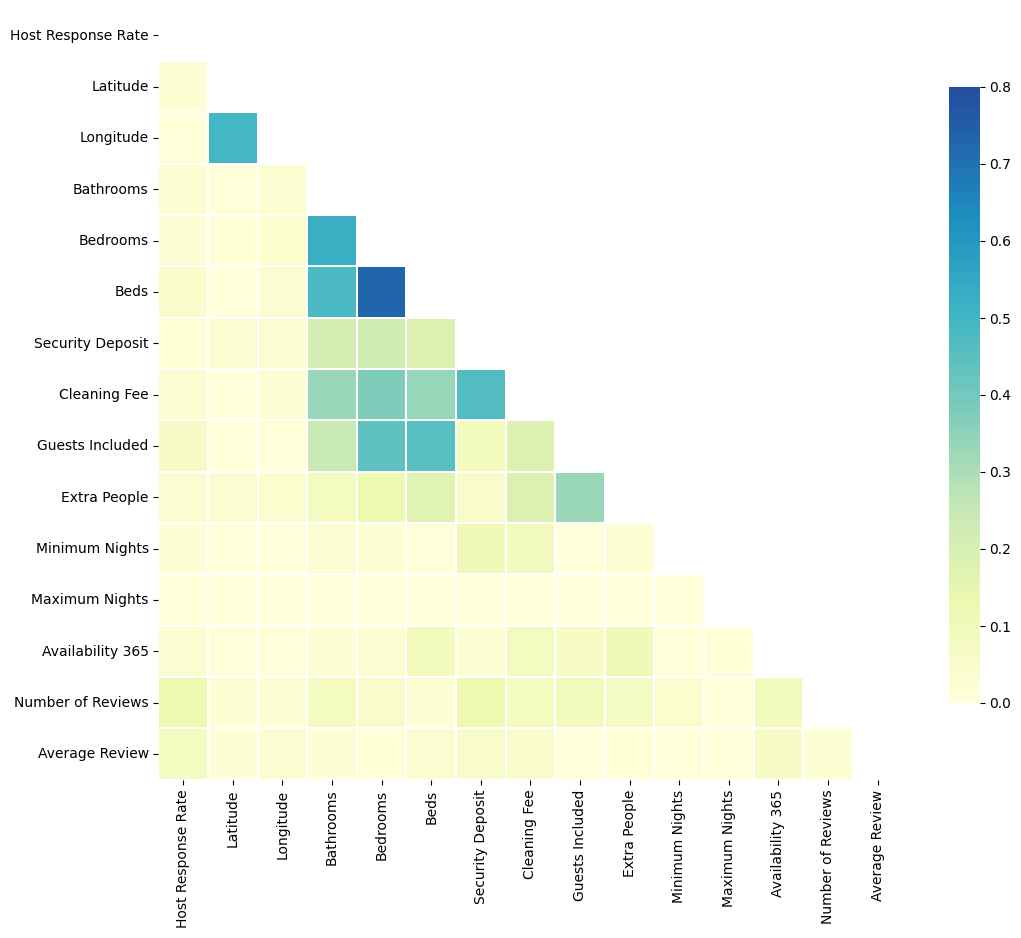

In [20]:
df_numeric = df.select_dtypes(include=[np.number])
corr = np.abs(df_numeric.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=0.8, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


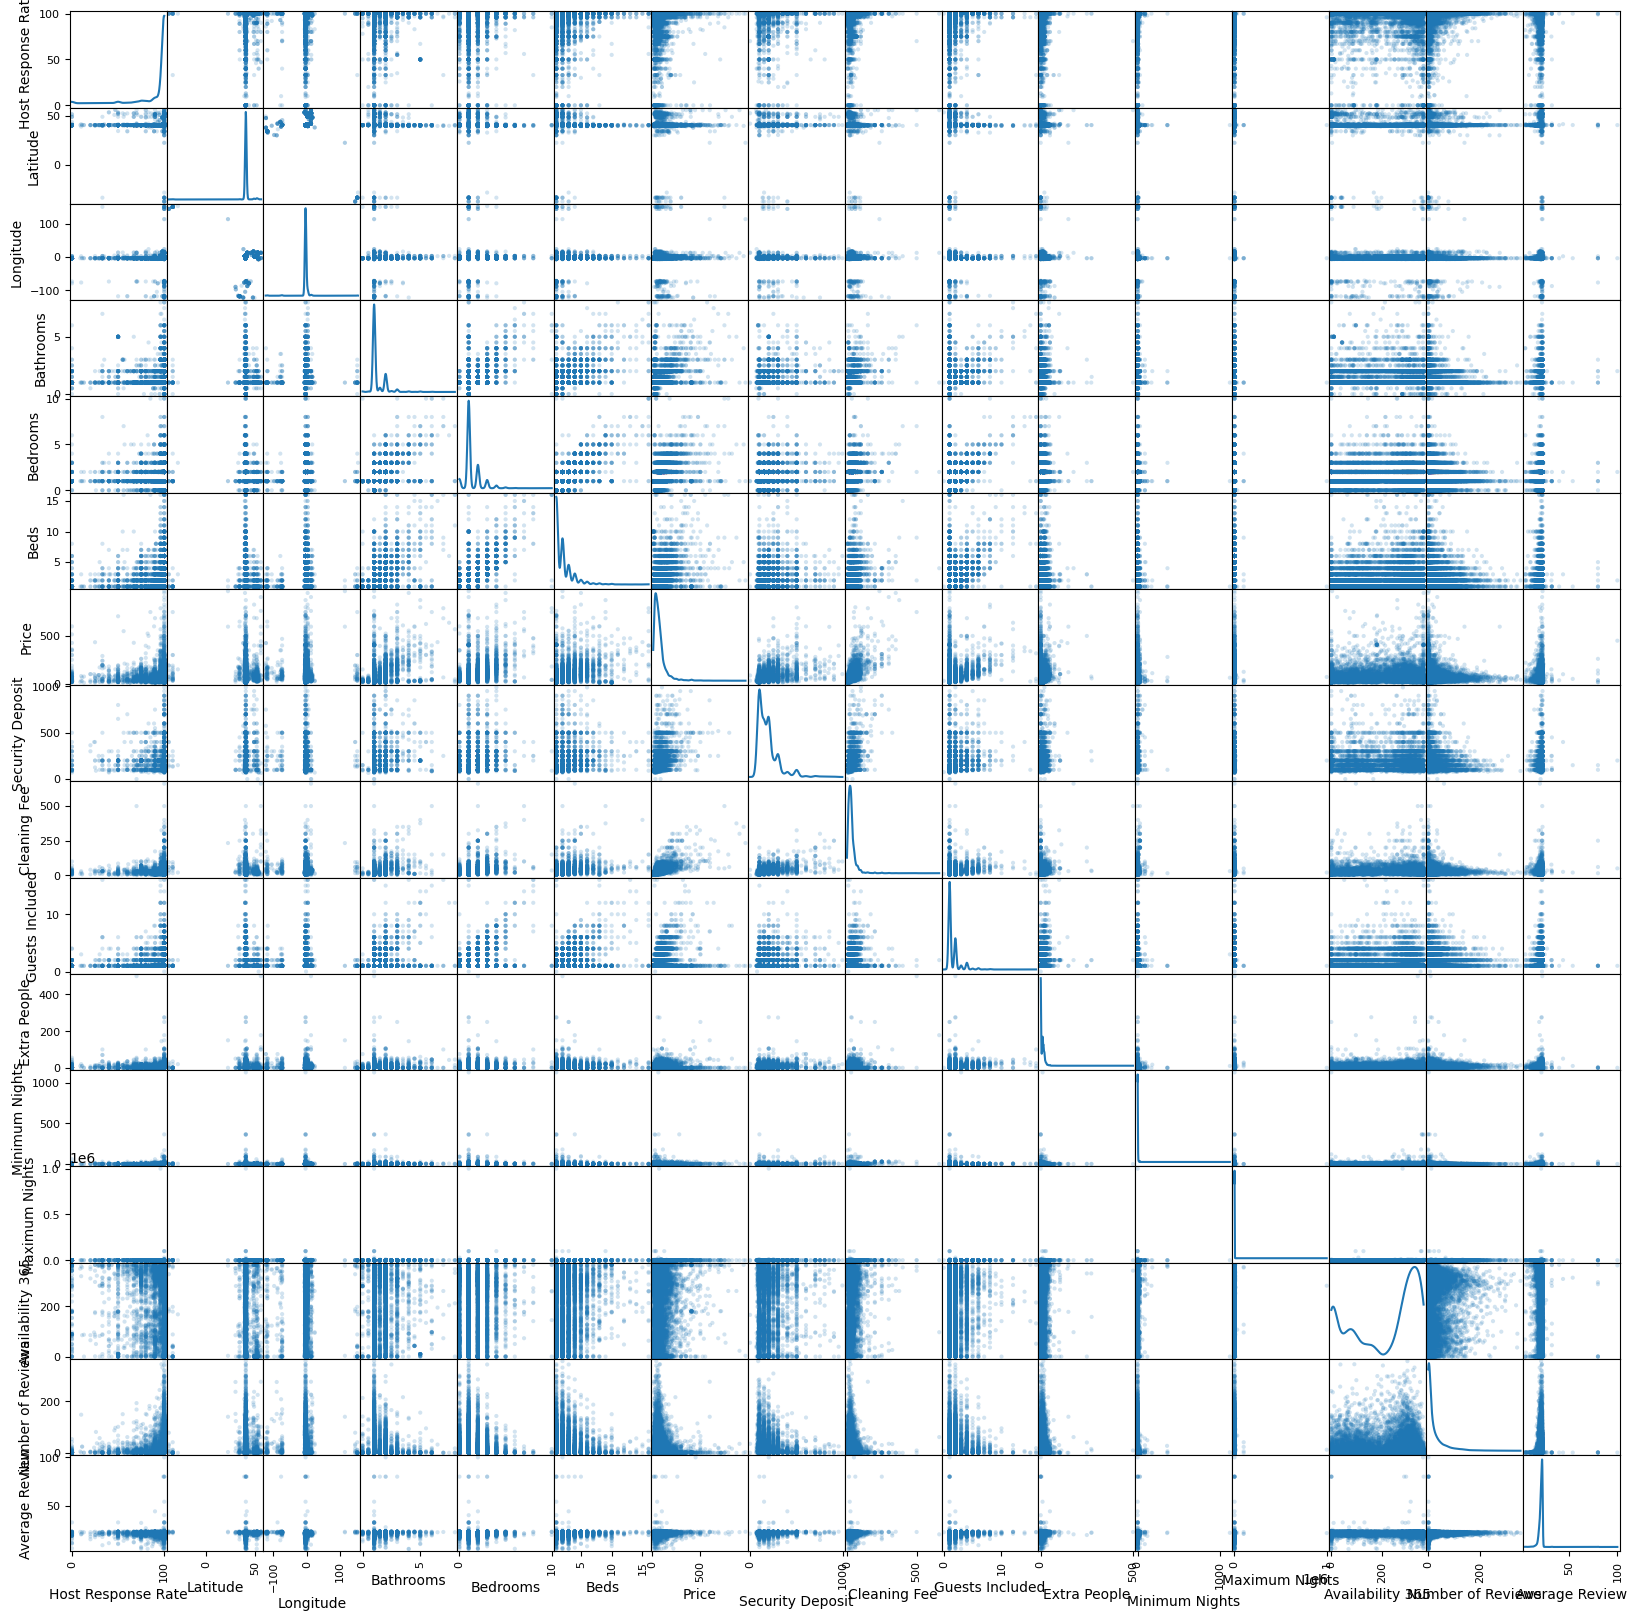

In [21]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

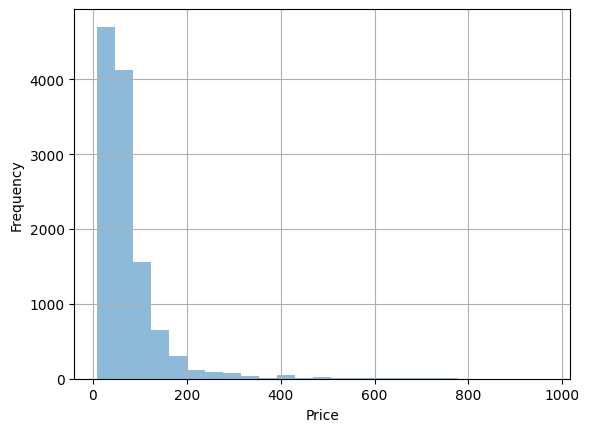

In [22]:
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

In [23]:
len(df[df['Price'] > 200])

464

In [24]:
df = df[df['Price'] < 200]

In [25]:
df.shape

(11285, 31)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9872.0,94.819996,15.120289,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,11285.0,40.486071,4.595661,-37.851182,40.409773,40.419178,40.430520,55.966912
Longitude,11285.0,-3.821344,13.528603,-123.124429,-3.707585,-3.700942,-3.685942,153.371427
Bathrooms,11245.0,1.232815,0.563749,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11265.0,1.269596,0.777219,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,11251.0,1.931384,1.400477,1.000000,1.000000,1.000000,2.000000,16.000000
Price,11285.0,62.101462,37.735374,9.000000,32.000000,55.000000,80.000000,199.000000
Security Deposit,4831.0,181.717450,105.519681,0.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,6689.0,28.722679,20.315457,0.000000,15.000000,25.000000,35.000000,250.000000
Guests Included,11285.0,1.536110,0.997006,0.000000,1.000000,1.000000,2.000000,16.000000


2. Generación de características

In [27]:
df_n = df[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]
df_n.head(20)

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
0,Jerónimos,Jerónimos,Retiro
1,NaN,Sol,Centro
2,Carabanchel,Vista Alegre,Carabanchel
3,NaN,Embajadores,Centro
4,Gaztambide,Gaztambide,Chamberí
5,Embajadores,Embajadores,Centro
6,NaN,Palacio,Centro
7,Sol,Sol,Centro
8,NaN,Calvià,NaN
9,Goya,Goya,Salamanca


In [28]:
print(f'El dataframe tiene un total de {len(df_n)} filas.')
len(df_n) - df_n.count()

El dataframe tiene un total de 11285 filas.


Neighbourhood                   3917
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     667
dtype: int64

In [29]:
df_n.apply(lambda x: len(x.unique()))

Neighbourhood                   323
Neighbourhood Cleansed          418
Neighbourhood Group Cleansed     47
dtype: int64

Primera creación de características

In [30]:
df_n["Final Neighbourhood"] = df_n["Neighbourhood Group Cleansed"].fillna(df_n["Neighbourhood Cleansed"])

In [31]:
len(df_n) - df_n.count()


Neighbourhood                   3917
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     667
Final Neighbourhood                0
dtype: int64

In [32]:
df_n.apply(lambda x: len(x.unique()))


Neighbourhood                   323
Neighbourhood Cleansed          418
Neighbourhood Group Cleansed     47
Final Neighbourhood             253
dtype: int64

In [33]:
df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])
df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

Segunda generación de características:

In [34]:
df_l = df[['Features', 'Amenities', 'Host Verifications']]
df_l.fillna("", inplace=True)

df_l['Features'] = df_l['Features'].apply(lambda x: len(str(x).split(',')))
df_l['Amenities'] = df_l['Amenities'].apply(lambda x: len(str(x).split(',')))
df_l['Host Verifications'] = df_l['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df_l.head(10)

,Features,Amenities,Host Verifications
0,3,13,4
1,4,18,6
2,5,25,7
3,2,5,4
4,4,15,4
5,5,15,4
6,3,20,3
7,3,12,4
8,4,20,5
9,6,23,5


In [35]:
df['Features'].fillna("", inplace=True)
df['Amenities'].fillna("", inplace=True)
df['Host Verifications'].fillna("", inplace=True)

df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [36]:
df.columns

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Verifications', 'City', 'Country Code',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood'],
      dtype='object')

Tercera generación de características

In [37]:
from datetime import datetime

df.dropna(subset=['Host Since'], inplace=True)

df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)

df.drop(['Host Since'], axis=1, inplace=True)

3. Categorización de variables

In [38]:
print(f"Registros con cero baños: {len(df[df['Bathrooms'] == 0])}")
print(f"Registros con precio cero: {len(df[df['Price'] == 0])}")
      
df = df[df['Bathrooms'] != 0]
df = df[df['Price'] != 0]

Registros con cero baños: 53
Registros con precio cero: 0


In [39]:
list(df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [40]:
df_nn = df[list(df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique()))

Experiences Offered      5
Host Response Time       5
City                   192
Country Code            16
Property Type           21
Room Type                3
Bed Type                 5
Cancellation Policy      8
Final Neighbourhood    253
dtype: int64

In [41]:
len(df_nn) - df_nn.count()

Experiences Offered       0
Host Response Time     1388
City                      2
Country Code              0
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
Final Neighbourhood       0
dtype: int64

In [42]:
df_nn["Host Response Time"].value_counts()

Host Response Time
within an hour        6076
within a few hours    2180
within a day          1361
a few days or more     224
Name: count, dtype: int64

In [43]:
df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)

In [44]:
df["Experiences Offered"].value_counts()

Experiences Offered
none        11219
business        4
social          3
family          2
romantic        1
Name: count, dtype: int64

In [45]:
df.drop(['Experiences Offered'], axis=1, inplace=True)

In [46]:
df_nn["City"].value_counts()

City
Madrid                                 10203
Barcelona                                206
London                                    95
Paris                                     75
Palma                                     40
Berlin                                    32
Roma                                      29
Dublin                                    28
New York                                  24
Los Angeles                               24
Alcúdia                                   21
Brooklyn                                  21
Wien                                      20
Amsterdam                                 18
Rome                                      16
Madrid, Comunidad de Madrid, ES           14
Toronto                                   12
Palma de Mallorca                         10
Inca                                       9
Chicago                                    8
Washington                                 8
Bondi Beach                                7
Santa

In [47]:
df_nn["Country Code"].value_counts()

Country Code
ES    10668
US      125
GB      118
FR       77
IT       57
AU       34
IE       33
DE       33
AT       26
NL       18
BE       16
CA       15
CH        4
GR        3
It        1
CU        1
Name: count, dtype: int64

In [48]:
df.drop(['City', 'Country Code'], axis=1, inplace=True)

In [49]:
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy',
 'Final Neighbourhood'
]

mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

In [50]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

df.fillna(df.mean(), inplace=True)
df.isnull().any()

Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Average Review         False
Final Neighbourhood    False
Years Being Host       False
dtype: bool

In [51]:
df.describe()

,Price,Host Response Time,Host Response Rate,Host Verifications,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Average Review,Final Neighbourhood,Years Being Host
count,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000
mean,62.233859,62.233859,94.824611,4.127527,40.492999,-3.835718,62.233859,62.233859,1.238717,1.270140,1.932827,62.233859,14.253807,181.716508,28.742288,1.538516,7.482679,3.000356,965.842551,201.355864,23.292368,62.233859,3.731944,21.260371,62.233859,2.758215
std,37.754485,0.522435,14.139337,1.269430,4.553308,13.483206,5.156736,23.330766,0.557712,0.773861,1.397345,1.554922,4.742390,69.113431,15.670342,0.998690,10.492707,13.239739,9632.615438,128.328316,38.557090,7.206774,1.053737,2.162715,16.645810,1.634771
min,10.000000,59.473214,0.000000,1.000000,-37.851182,-123.124429,20.500000,25.733766,0.500000,0.000000,1.000000,43.222222,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,53.405579,1.000000,4.857143,20.000000,0.000000
25%,32.000000,61.914769,94.824611,3.000000,40.409759,-3.707529,63.083949,34.001611,1.000000,1.000000,1.000000,62.447512,11.000000,181.716508,20.000000,1.000000,0.000000,1.000000,360.000000,77.000000,1.000000,53.405579,3.000000,21.000000,58.250000,1.000000
50%,55.000000,62.525857,100.000000,4.000000,40.419152,-3.700916,63.083949,81.289259,1.000000,1.000000,1.000000,62.447512,14.000000,181.716508,28.742288,1.000000,0.000000,2.000000,1125.000000,239.000000,7.000000,61.350999,4.000000,21.260371,66.813011,3.000000
75%,80.000000,62.525857,100.000000,5.000000,40.430508,-3.685801,63.083949,81.289259,1.000000,1.000000,2.000000,62.447512,17.000000,181.716508,30.000000,2.000000,14.000000,3.000000,1125.000000,319.000000,28.000000,69.885674,4.000000,22.285714,66.813011,4.000000
max,199.000000,62.525857,100.000000,10.000000,55.966912,153.371427,148.333333,81.289259,8.000000,10.000000,16.000000,62.447512,39.000000,990.000000,250.000000,16.000000,276.000000,1125.000000,1000000.000000,365.000000,356.000000,95.882353,8.000000,80.000000,198.000000,8.000000


4 Construcción y validación del modelo

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = df.values

y_train = data[:,0:1]
X_train = data[:,1:]

feature_names = df.columns[1:]


scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -516.156
best parameters: {'alpha': 0.09412049672680665}


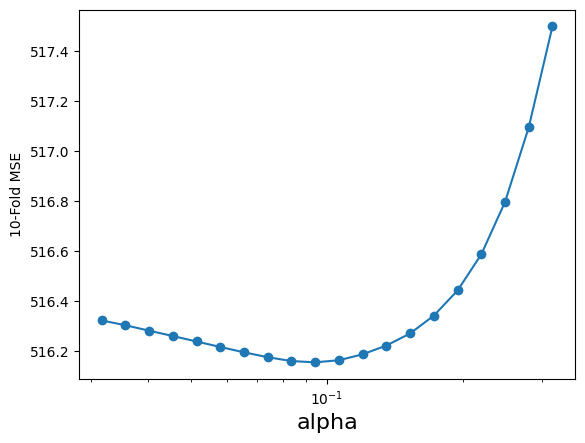

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5,-0.5,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [54]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df_test.drop(not_useful_columns, axis=1, inplace=True)
df_test.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)
df_test.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)
df_test.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

reviews = df_test.loc[: , "Review Scores Rating":"Review Scores Value"]
df_test['Average Review'] = reviews.mean(axis=1)

df_test.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

df_test = df_test[df_test['Price'] < 200]

df_test["Final Neighbourhood"] = df_test["Neighbourhood Group Cleansed"].fillna(df_test["Neighbourhood Cleansed"])
df_test.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

df_test['Features'].fillna("", inplace=True)
df_test['Amenities'].fillna("", inplace=True)
df_test['Host Verifications'].fillna("", inplace=True)

df_test['Features'] = df_test['Features'].apply(lambda x: len(str(x).split(',')))
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(',')))
df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df_test.dropna(subset=['Host Since'], inplace=True)
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Years Being Host'] = df_test['Host Since'].apply(lambda x: 2017 - x.year)
df_test.drop(['Host Since'], axis=1, inplace=True)

df_test = df_test[df_test['Bathrooms'] != 0]
df_test = df_test[df_test['Price'] != 0]

df_test["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)
df_test.drop(['Experiences Offered'], axis=1, inplace=True)
df_test.drop(['City', 'Country Code'], axis=1, inplace=True)

categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy',
 'Final Neighbourhood'
]


for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])


df[categorical].dtypes

Host Response Time     float64
Property Type          float64
Room Type              float64
Bed Type               float64
Cancellation Policy    float64
Final Neighbourhood    float64
dtype: object

In [55]:
cols = df_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_test = df_test[cols]

df_test.fillna(df.mean(), inplace=True)

print(df.shape, df_test.shape)

(11229, 26) (2807, 26)


In [56]:
data_test = df_test.values

y_test = data_test[:,0:1]
X_test = data_test[:,1:]

feature_names_test = df_test.columns[1:]

XtestScaled = scaler.transform(X_test) 

In [57]:
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 513.25
MSE Modelo Lasso (test) : 531.08
Host Response Time 0.0
Host Response Rate -1.3284702022097314
Host Verifications -0.7582332901828202
Latitude -0.6888141153631326
Longitude -0.8534522273745528
Property Type 0.0563841245118085
Room Type 15.763248243613356
Bathrooms 2.140281601443335
Bedrooms 7.646702779439937
Beds 1.491759228399902
Bed Type 0.4979014085301052
Amenities 2.4142700594675017
Security Deposit 2.6268153016249807
Cleaning Fee 5.835227910365364
Guests Included 3.170531165174793
Extra People -0.17428700324826887
Minimum Nights -0.5814786828783459
Maximum Nights -0.0
Availability 365 1.5813237907429982
Number of Reviews -3.1183990987189714
Cancellation Policy -0.6887213218471524
Features 0.8486790120172639
Average Review 1.3359213228203486
Final Neighbourhood 9.771248673196443
Years Being Host 0.753995282136033


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.1)
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=0, max_depth=3),
    param_distributions=param_dist,
    n_iter=10,  # Puedes reducir el número de iteraciones si es necesario
    cv=5,
    random_state=0
)

random_search.fit(X_train, y_train)

print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))
print("Best parameters: {}".format(random_search.best_params_))

Best mean cross-validation score: 0.743
Best parameters: {'learning_rate': 0.09442657485810173, 'n_estimators': 351}


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500, 1000, 5000, 8000]
learningRate = [0.1, 0.01]

grid.fit(X_train, y_train)


learning_rate = grid.best_params_['learning_rate']
NEstimators = grid.best_params_['n_estimators']


bt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=learning_rate, n_estimators=NEstimators)
bt.fit(X_train, y_train)


error = 1 - grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))
colors = ['r', 'b', 'g', 'k', 'm']
for i, lr in enumerate(learningRate):    
    plt.plot(Niterations, error[i, :], colors[i] + '--o', label='lr = %g' % lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f' % (bt.score(X_train, y_train), bt.score(X_test, y_test)))
plt.grid()
plt.show()

KeyboardInterrupt: 

In [69]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

NameError: name 'bt' is not defined

In [70]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)
print('R^2 en datos de test: ' + str(round(rf_testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error,3)))

R^2 en datos de test: 0.731
Mediana del error en datos de test: 9.1
Media del error en datos de test: 13.41


In [ ]:
tuned_parameters = {
    "n_estimators": [100, 500, 1000, 2000]
}

rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)

preds = rf_tuned.fit(X_train, y_train)
best = rf_tuned.best_estimator_ 
y_predict = rf_tuned.predict(X_test)
rft_testing_set_score = rf_tuned.score(X_test, y_test)
rft_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)

print('Mejores parámetros:', rf_tuned.best_params_)
print('R^2 en datos de test: ' + str(round(rf_testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error,3)))

In [ ]:
df_test.describe()